In [1]:
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

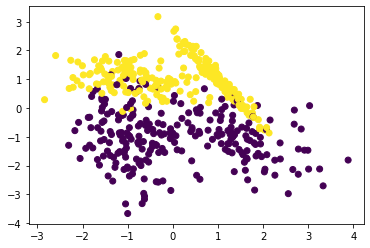

In [3]:
X, y = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=2, n_classes=2) # [n_samples, n_features]

plt.scatter(X[:, 0], X[:, 1], c=y)

In [4]:
# y = sigmoid(Wx + b)

def init_params(num_features: int):
    W = np.zeros((1, num_features))
    b = 0
    return W, b

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def d_sigmoid(x):
    s = sigmoid(x)
    return s * (1 - s)

def forward_pass(W, x, b):
    z = np.dot(W, x) + b
    return sigmoid(z)

def backward_pass(X, y, y_pred):
    dW = np.sum(X * (y_pred - y), axis=1)
    db = np.sum(y_pred - y)
    return dW, db

def loss_bin_crossentropy(y_pred, y) -> float:
    """ Cross entropy loss """
    num_samples = y_pred.shape[1]
    return -np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)) / num_samples

X_train.shape (2, 500)
y_train.shape (1, 500)
[epoch 10] Loss=0.3311421127097352)
[epoch 20] Loss=0.27275688973339174)
[epoch 30] Loss=0.2502408809094781)
[epoch 40] Loss=0.23834004101067804)
[epoch 50] Loss=0.2310628019441719)
[epoch 60] Loss=0.2262203888690146)
[epoch 70] Loss=0.22281507998399494)
[epoch 80] Loss=0.22032517813980115)
[epoch 90] Loss=0.21845105972456472)
[epoch 100] Loss=0.21700848401466807)


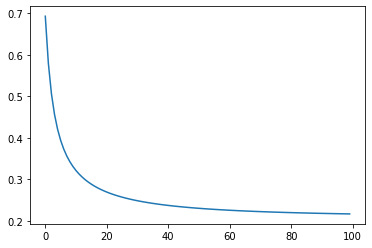

In [27]:
num_epoch = 100
learning_rate = 0.001

X_train = X.T
y_train = y.T.reshape(1, -1)

print('X_train.shape', X_train.shape)
print('y_train.shape', y_train.shape)

losses = []
W, b = init_params(X_train.shape[0])
for epoch in range(1, num_epoch + 1):
    y_pred = forward_pass(W, X_train, b)
    
    loss = loss_bin_crossentropy(y_pred, y_train)
    
    dW, db = backward_pass(X_train, y_train, y_pred)
    
    W -= learning_rate * dW
    b -= learning_rate * db
    
    if epoch % 10 == 0:
        print(f'[epoch {epoch}] Loss={loss})')
    losses.append(loss)
    
plt.plot(range(len(losses)), losses)

In [28]:
y_train_pred = np.asarray(forward_pass(W, X_train, b) < 0.5, dtype=np.int)
print('y_train_pred.shape', y_train_pred.shape)

y_train_pred.shape (1, 500)


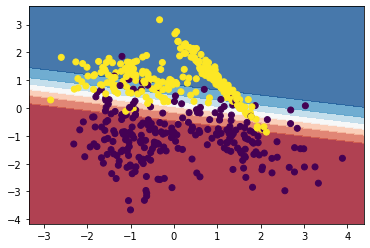

In [29]:
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

X_mesh = np.c_[xx.ravel(), yy.ravel()].T
Z = forward_pass(W, X_mesh, b)
Z = Z.reshape(xx.shape[0], -1)

plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=.8)
plt.scatter(X_train[0,:], X_train[1,:], c=y_train[0])